# Classifying Muffins and Cupcakes with Support Vector Machine

Step 1: Import necessary dependencies

In [5]:
#Packages for Analysis
import pandas as pd
import numpy as np
from sklearn import svm

#Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

#allow charts to appear in notebook
%matplotlib inline


#pickle
import pickle

Step 2: Import the data

In [7]:
#read the cupcakes and muffin ingredient data
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


Step 3: Prepare the data

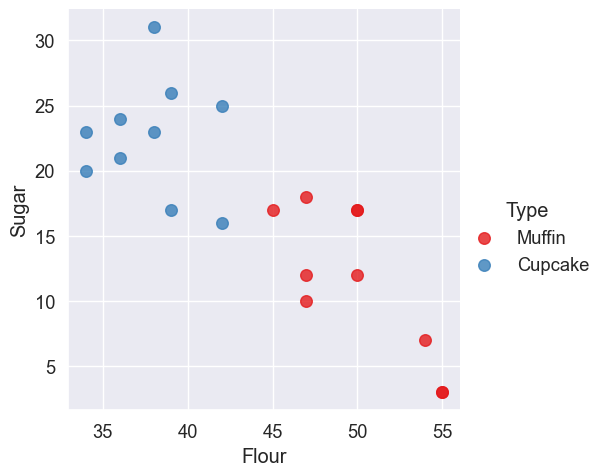

In [13]:
#Plot two ingredients
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue ='Type',
          palette='Set1', fit_reg=False, scatter_kws= {"s":70})

In [20]:
#Specify the input for the model
#ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder']]
ingredients = recipes[['Flour', 'Sugar']].values
type_label = np.where(recipes['Type']== 'Muffin', 0, 1)

#Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

Step 4: Fit the model

In [21]:
#Fit the SVM model
model = svm.SVC(kernel = 'linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

Step 5: Visualize Results

In [26]:
#Get the separating hyperplane
w = model.coef_[0]
a = -w[0]/ w[1]

xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0] / w[1])

#Plot the parallels to the separating hyperplane that pass through the support vector machine
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

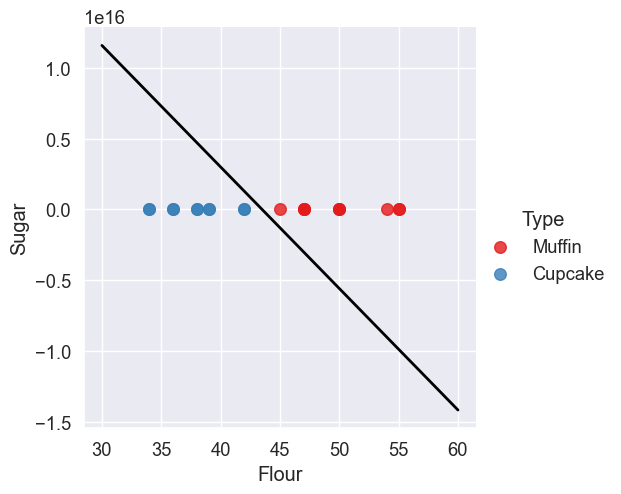

In [27]:
#Plot two ingredients
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue ='Type',
          palette='Set1', fit_reg=False, scatter_kws= {"s":70})
plt.plot(xx, yy, linewidth=2, color='black')

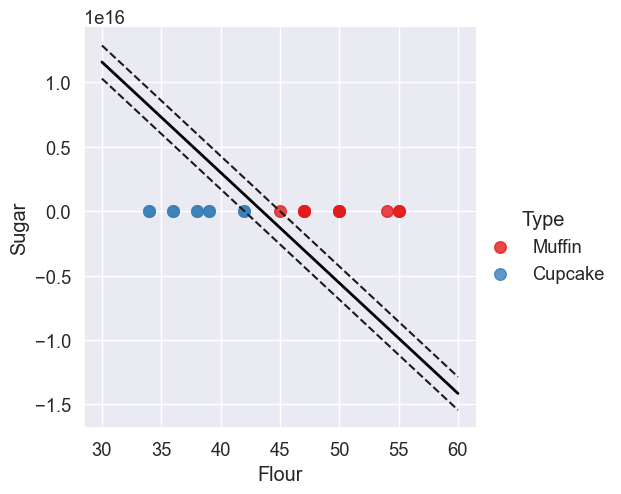

In [30]:
#Look at the margins and support vectors
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue ='Type',
          palette='Set1', fit_reg=False, scatter_kws= {"s":70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, -1],
            s=80, facecolors='none')

Step 6: Predict New Case

In [33]:
#Create a function to guess if a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if (model.predict([[flour, sugar]])) == 0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')
        

In [36]:
#Predict if 50 parts flour and 30 parts sugar
muffin_or_cupcake(30, 30)

You're looking at a cupcake recipe!


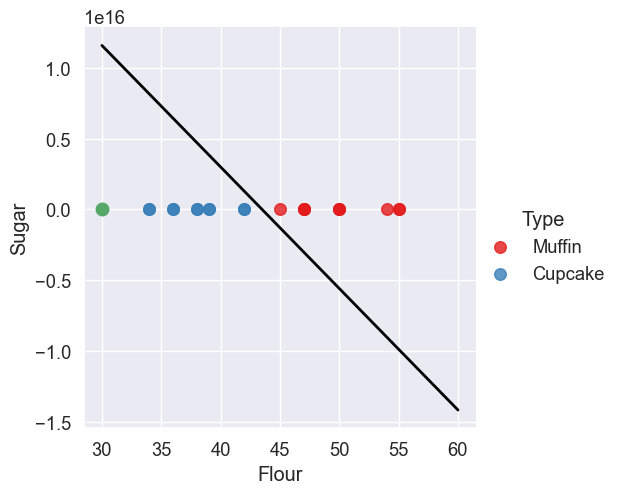

In [37]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue ='Type',
          palette='Set1', fit_reg=False, scatter_kws= {"s":70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(30,30, 'go', markersize='9')

In [40]:
muffin_cupcake_dict = {'muffin_cupcake_model': model, 'muffin_cupcake_features': ['Flour', 'Sugar'], 'all_features': recipe_features}

In [41]:
muffin_cupcake_dict

{'muffin_cupcake_model': SVC(kernel='linear'),
 'muffin_cupcake_features': ['Flour', 'Sugar'],
 'all_features': ['Flour',
  'Milk',
  'Sugar',
  'Butter',
  'Egg',
  'Baking Powder',
  'Vanilla',
  'Salt']}

In [43]:
#pickle
pickle.dump(muffin_cupcake_dict, open("muffin_cupcake_dict.p", "wb"))

In [44]:
pickle.dumps(muffin_cupcake_dict)

b'\x80\x04\x95\xbd\x05\x00\x00\x00\x00\x00\x00}\x94(\x8c\x14muffin_cupcake_model\x94\x8c\x14sklearn.svm._classes\x94\x8c\x03SVC\x94\x93\x94)\x81\x94}\x94(\x8c\x17decision_function_shape\x94\x8c\x03ovr\x94\x8c\nbreak_ties\x94\x89\x8c\x06kernel\x94\x8c\x06linear\x94\x8c\x06degree\x94K\x03\x8c\x05gamma\x94\x8c\x05scale\x94\x8c\x05coef0\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x03tol\x94G?PbM\xd2\xf1\xa9\xfc\x8c\x01C\x94G?\xf0\x00\x00\x00\x00\x00\x00\x8c\x02nu\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x07epsilon\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\tshrinking\x94\x88\x8c\x0bprobability\x94\x89\x8c\ncache_size\x94K\xc8\x8c\x0cclass_weight\x94N\x8c\x07verbose\x94\x89\x8c\x08max_iter\x94J\xff\xff\xff\xff\x8c\x0crandom_state\x94N\x8c\x07_sparse\x94\x89\x8c\x0en_features_in_\x94K\x02\x8c\rclass_weight_\x94\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\x02\x85\x94h!\x8c\x05dtype\x94\x93\x